In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import length,col
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("MusicEDA").getOrCreate()

df = spark.read.csv("../data/Mendeley_cleaned.csv", header=True, inferSchema=True)

In [4]:
# Count songs per genre
df.groupBy("genre").count().show()

# Lyrics length column
df = df.withColumn("lyrics_length", length(col("lyrics")))

# Average lyrics length per genre
df.groupBy("genre").avg("lyrics_length").show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 7042|
|  blues| 4604|
|   jazz| 3845|
|hip hop|  904|
|country| 5445|
|   rock| 4034|
| reggae| 2498|
+-------+-----+

+-------+------------------+
|  genre|avg(lyrics_length)|
+-------+------------------+
|    pop|480.44788412382843|
|  blues|384.98305821025195|
|   jazz|450.91573472041614|
|hip hop| 613.3661504424779|
|country|378.57575757575756|
|   rock|  407.646256817055|
| reggae|  612.435548438751|
+-------+------------------+



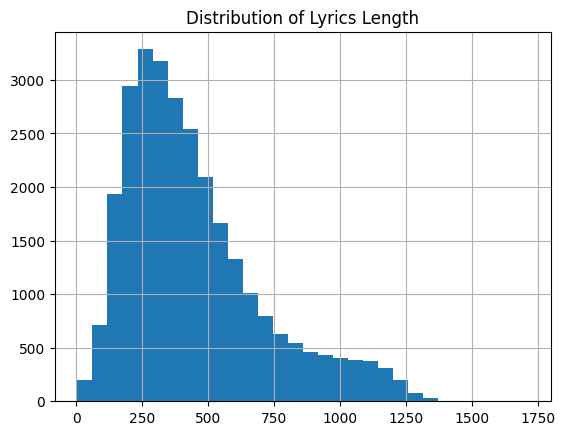

In [5]:
# Histogram of lyrics length
pdf = df.toPandas()
pdf["lyrics_length"].hist(bins=30)
plt.title("Distribution of Lyrics Length")
plt.show()